In [19]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

import numpy as np
import scipy.linalg as la
from qiskit.aqua.components import iqfts

In [2]:
U = np.load("U.npy")

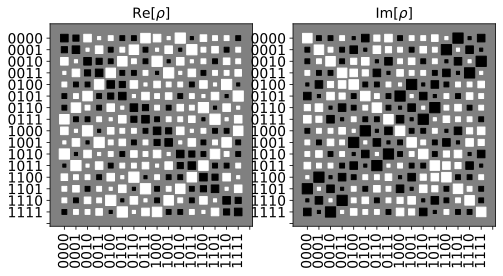

In [3]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(U)

In [4]:
from scipy.linalg import hadamard
H = hadamard (16, dtype=complex)/4

In [5]:
V = H @ U @H

In [6]:
for i in range(16):
    for j in range(16):
        if abs(V[i,j])<10**(-6):
            V[i,j] = 0

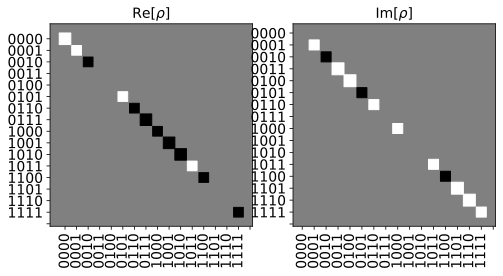

In [7]:
plot_state_hinton(V)

In [8]:
for i in range(16):
    print(np.angle(V[i,i])/np.pi)

3.9894978426343606e-17
0.25000000000000006
-0.75
0.5
0.5
-0.25000000000000006
0.75
-1.0
0.75
1.0
1.0
0.25
-0.75
0.5
0.5
0.7499999999999999


In [74]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

In [92]:
def get_phase(init_state = -1):
    qpe = QuantumCircuit(7, 3)
    
    if init_state == -1:
            for i in range(7):
                qpe.h(i)
    else:
        for i in range(3):
            qpe.h(i)
        for i in range(3,7):
            if format(init_state, '04b')[i-3] == '1':
                qpe.x(i)
    qpe.barrier()
    for i in range(3):
        for j in range(2**i):
            qpe.cu1(np.pi/4,  i, 3)
            qpe.cu1(5*np.pi/4, i, 4)
            qpe.cu1(2*np.pi/4, i, 5)
            qpe.cu1(3*np.pi/4, i, 6)
            
            qpe.h(4)
            qpe.ccx(i,3,4)
            qpe.h(4)
            
            qpe.h(5)
            qpe.ccx(i,4,5)
            qpe.h(5)
            
            qpe.h(5)
            qpe.ccx(i,3,5)
            qpe.h(5)
            
            qpe.h(6)
            qpe.ccx(i,4,6)
            qpe.h(6)
        qpe.barrier()

            
    
    iqfts.Standard(3).construct_circuit(qubits=qpe.qubits[0:3], circuit=qpe)
    #qft_dagger(qpe,3)
    qpe.measure(0,0)
    qpe.measure(1,1)
    qpe.measure(2,2)
    vector_sim = Aer.get_backend('statevector_simulator')
    qsm = Aer.get_backend('qasm_simulator')
    counts = execute(qpe,qsm, shots=8192).result().get_counts()
    return counts

In [90]:
for i in range(15):
    print(get_phase(i))

{'000': 100}
{'011': 100}
{'010': 100}
{'101': 100}
{'101': 100}
{'100': 100}
{'011': 100}
{'010': 100}
{'001': 100}
{'100': 100}
{'111': 100}
{'010': 100}
{'010': 100}
{'001': 100}
{'100': 100}


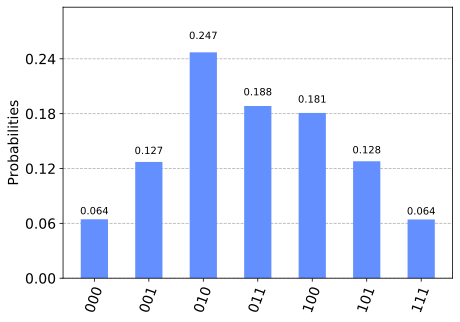

In [94]:
plot_histogram(get_phase(-1))